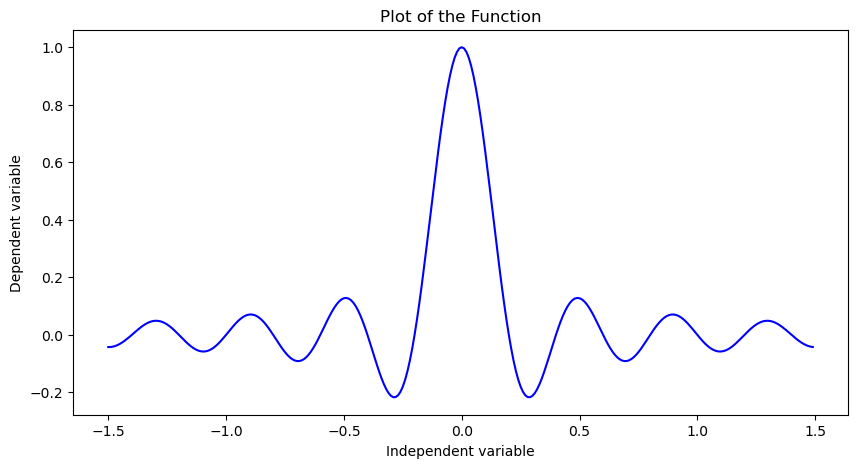

Total parameters in Model 1: 571
Current Epoch: 500
Current Loss: 0.0050

Current Epoch: 1000
Current Loss: 0.0028

Current Epoch: 1500
Current Loss: 0.0024

Current Epoch: 2000
Current Loss: 0.0025

Current Epoch: 2500
Current Loss: 0.0025

Current Epoch: 3000
Current Loss: 0.0024

Current Epoch: 3500
Current Loss: 0.0023

Current Epoch: 4000
Current Loss: 0.0024

Current Epoch: 4500
Current Loss: 0.0025

Current Epoch: 5000
Current Loss: 0.0025

Current Epoch: 5500
Current Loss: 0.0022

Current Epoch: 6000
Current Loss: 0.0021

Current Epoch: 6500
Current Loss: 0.0021

Current Epoch: 7000
Current Loss: 0.0020

Current Epoch: 7500
Current Loss: 0.0017

Current Epoch: 8000
Current Loss: 0.0019

Current Epoch: 8500
Current Loss: 0.0019

Current Epoch: 9000
Current Loss: 0.0016

Current Epoch: 9500
Current Loss: 0.0020

Current Epoch: 10000
Current Loss: 0.0014

Current Epoch: 10500
Current Loss: 0.0014

Current Epoch: 11000
Current Loss: 0.0014

Current Epoch: 11500
Current Loss: 0.0015

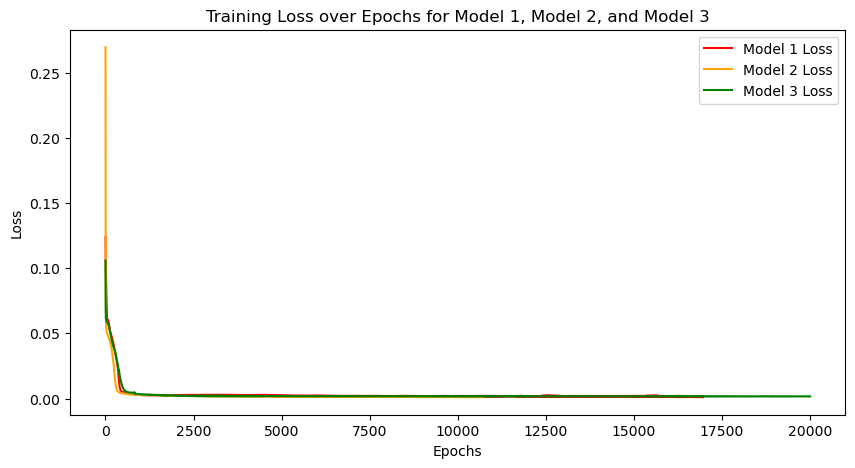

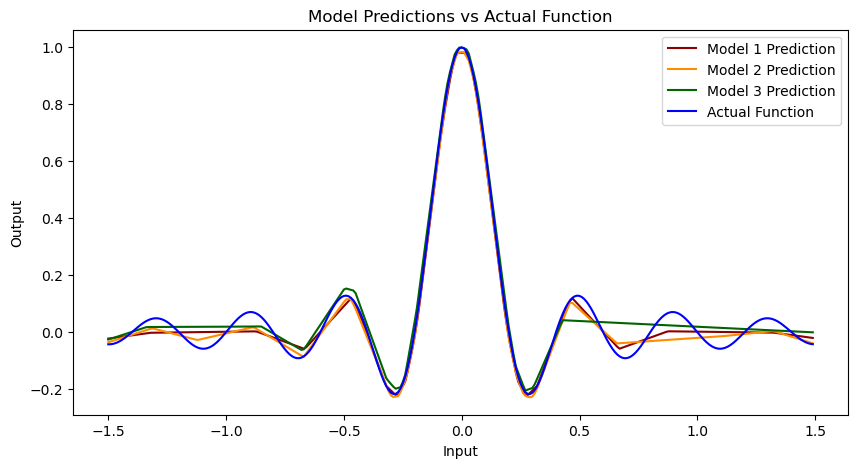

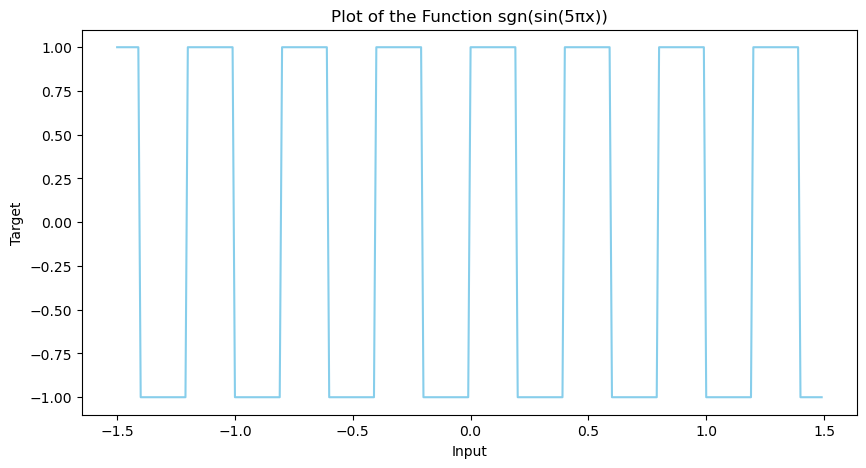


Training Model 1 on sgn(sin(5πx))
Current Epoch: 500
Current Loss: 0.6389

Current Epoch: 1000
Current Loss: 0.5696

Current Epoch: 1500
Current Loss: 0.5221

Current Epoch: 2000
Current Loss: 0.5345

Current Epoch: 2500
Current Loss: 0.4625

Current Epoch: 3000
Current Loss: 0.4669

Current Epoch: 3500
Current Loss: 0.4040

Current Epoch: 4000
Current Loss: 0.4020

Current Epoch: 4500
Current Loss: 0.3497

Current Epoch: 5000
Current Loss: 0.3426

Current Epoch: 5500
Current Loss: 0.3586

Current Epoch: 6000
Current Loss: 0.3905

Current Epoch: 6500
Current Loss: 0.3450

Current Epoch: 7000
Current Loss: 0.3159

Current Epoch: 7500
Current Loss: 0.3138

Current Epoch: 8000
Current Loss: 0.3011

Current Epoch: 8500
Current Loss: 0.3257

Current Epoch: 9000
Current Loss: 0.2983

Current Epoch: 9500
Current Loss: 0.3015

Current Epoch: 10000
Current Loss: 0.2973

Current Epoch: 10500
Current Loss: 0.3054

Current Epoch: 11000
Current Loss: 0.2919

Current Epoch: 11500
Current Loss: 0.27

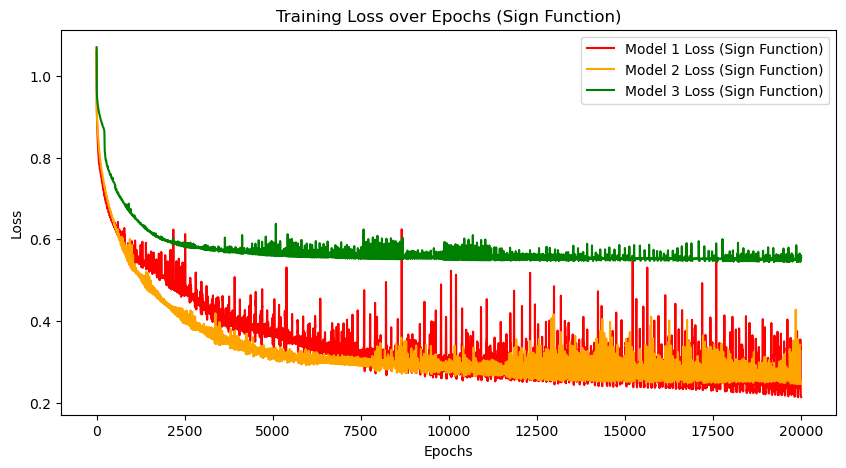

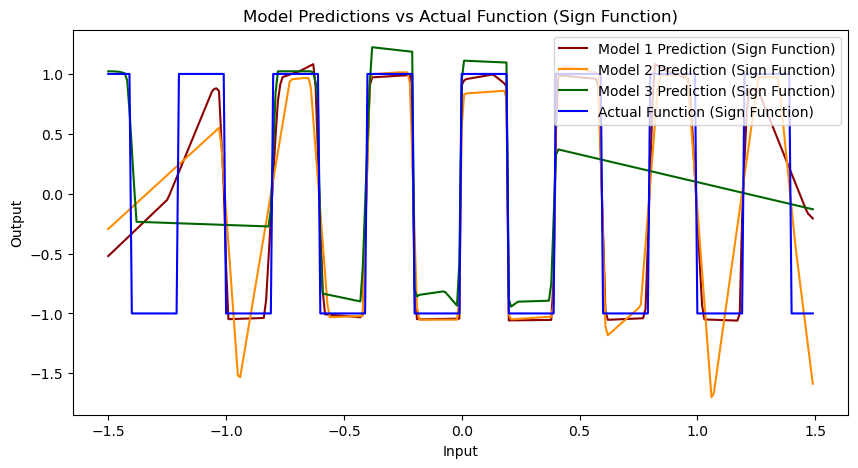

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# Set manual seed for reproducibility
torch.manual_seed(1)

# Generate input and target data
x = np.expand_dims(np.arange(-1.5, 1.5, 0.01), 1)
y = (np.sin(5 * np.pi * x)) / (5 * np.pi * x)

# Convert input and target data to tensors
x, y = torch.tensor(x, dtype=torch.float32), torch.tensor(y, dtype=torch.float32)

# Visualize the input vs. target data
plt.figure(figsize=(10, 5))
plt.plot(x, y, color="blue")
plt.title('Plot of the Function')
plt.xlabel('Independent variable')
plt.ylabel('Dependent variable')
plt.show()

# Define the training function
def train_model(model, x, y, optimizer, loss_func):
    max_epoch = 20000
    epoch_arr, loss_arr = [], []
    not_converged = True
    epoch = 0
    while not_converged:
        epoch += 1
        prediction = model(x)
        loss = loss_func(prediction, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        epoch_arr.append(epoch)
        loss_arr.append(loss.detach().numpy())

        if epoch % 500 == 0:
            print(f'Current Epoch: {epoch}')
            print(f'Current Loss: {loss.item():.4f}')
            print()

        if epoch == max_epoch:
            print("Max epoch reached without convergence")
            not_converged = False

        elif (epoch > 5) and (loss_arr[-1] < 0.001):
            if abs(loss_arr[-3] - loss_arr[-2]) < 1.0e-05 and abs(loss_arr[-2] - loss_arr[-1]) < 1.0e-05:
                print("Convergence reached for loss:", loss_arr[-1])
                not_converged = False

    return epoch_arr, loss_arr, prediction

# Define Model 1 layers
layers_model_1 = [
    nn.Linear(1, 5), nn.LeakyReLU(),
    nn.Linear(5, 10), nn.LeakyReLU(),
    nn.Linear(10, 10), nn.LeakyReLU(),
    nn.Linear(10, 10), nn.LeakyReLU(),
    nn.Linear(10, 10), nn.LeakyReLU(),
    nn.Linear(10, 10), nn.LeakyReLU(),
    nn.Linear(10, 5), nn.LeakyReLU(),
    nn.Linear(5, 1)
]

# Create model instance using nn.Sequential
model_1 = nn.Sequential(*layers_model_1)

# Training setup for Model 1
optimizer_1 = optim.RMSprop(model_1.parameters(), lr=1e-3, weight_decay=1e-4)
loss_func_1 = nn.MSELoss()

# Print total parameters for Model 1
pytorch_total_params_1 = sum(p.numel() for p in model_1.parameters())
print(f'Total parameters in Model 1: {pytorch_total_params_1}')

# Train Model 1
m1_epoch_arr, m1_loss_arr, m1_prediction = train_model(model_1, x, y, optimizer_1, loss_func_1)

# Define Model 2 layers
layers_model_2 = [
    nn.Linear(1, 10), nn.LeakyReLU(),
    nn.Linear(10, 18), nn.LeakyReLU(),
    nn.Linear(18, 15), nn.LeakyReLU(),
    nn.Linear(15, 4), nn.LeakyReLU(),
    nn.Linear(4, 1)
]

# Create model instance using nn.Sequential
model_2 = nn.Sequential(*layers_model_2)

# Training setup for Model 2
optimizer_2 = optim.RMSprop(model_2.parameters(), lr=1e-3, weight_decay=1e-4)
loss_func_2 = nn.MSELoss()

# Print total parameters for Model 2
pytorch_total_params_2 = sum(p.numel() for p in model_2.parameters())
print(f'Total parameters in Model 2: {pytorch_total_params_2}')

# Train Model 2
m2_epoch_arr, m2_loss_arr, m2_prediction = train_model(model_2, x, y, optimizer_2, loss_func_2)
# Define Model 3 layers to have exactly 580 parameters
layers_model_3 = [
    nn.Linear(1, 8), nn.ReLU(),  # 1*8 + 8 = 16 parameters
    nn.Linear(8, 12), nn.ReLU(),  # 8*12 + 12 = 108 parameters
    nn.Linear(12, 10), nn.ReLU(),  # 12*10 + 10 = 130 parameters
    nn.Linear(10, 7), nn.ReLU(),   # 10*7 + 7 = 77 parameters
    nn.Linear(7, 1)                # 7*1 + 1 = 8 parameters
]

# Total parameters: 16 + 108 + 130 + 77 + 8 = 339
# Remaining layers for adding more parameters:
# Adding more neurons at the start, intermediate or later layers 


# # Define Model 3 layers
# layers_model_3 = [
#     nn.Linear(1, 6), nn.ReLU(),
#     nn.Linear(6, 12), nn.ReLU(),
#     nn.Linear(12, 8), nn.ReLU(),
#     nn.Linear(8, 3), nn.ReLU(),
#     nn.Linear(3, 1)
# ]

# Create model instance using nn.Sequential
model_3 = nn.Sequential(*layers_model_3)

# Training setup for Model 3
optimizer_3 = optim.RMSprop(model_3.parameters(), lr=1e-3, weight_decay=1e-4)
loss_func_3 = nn.MSELoss()

# Print total parameters for Model 3
pytorch_total_params_3 = sum(p.numel() for p in model_3.parameters())
print(f'Total parameters in Model 3: {pytorch_total_params_3}')

# Train Model 3
m3_epoch_arr, m3_loss_arr, m3_prediction = train_model(model_3, x, y, optimizer_3, loss_func_3)

# Plotting the losses for all three models
plt.figure(figsize=(10, 5))
plt.plot(m1_epoch_arr, m1_loss_arr, color="red", label="Model 1 Loss")
plt.plot(m2_epoch_arr, m2_loss_arr, color="orange", label="Model 2 Loss")
plt.plot(m3_epoch_arr, m3_loss_arr, color="green", label="Model 3 Loss")
plt.title('Training Loss over Epochs for Model 1, Model 2, and Model 3')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

# Plotting the predictions for all three models compared to actual data
plt.figure(figsize=(10, 5))
plt.plot(x, m1_prediction.detach().numpy(), color="darkred", label='Model 1 Prediction')
plt.plot(x, m2_prediction.detach().numpy(), color="darkorange", label='Model 2 Prediction')
plt.plot(x, m3_prediction.detach().numpy(), color="darkgreen", label='Model 3 Prediction')
plt.plot(x, y, color="blue", label='Actual Function')
plt.title('Model Predictions vs Actual Function')
plt.xlabel('Input')
plt.ylabel('Output')
plt.legend(loc='upper right')
plt.show()

# Re-train the models on the sign function
x_sign = np.expand_dims(np.arange(-1.5, 1.5, 0.01), 1)
y_sign = np.sign(np.sin(5 * np.pi * x_sign))
x_sign, y_sign = torch.tensor(x_sign, dtype=torch.float32), torch.tensor(y_sign, dtype=torch.float32)

plt.figure(figsize=(10, 5))
plt.plot(x_sign, y_sign, color="skyblue")
plt.title('Plot of the Function sgn(sin(5πx))')
plt.xlabel('Input')
plt.ylabel('Target')
plt.show()

# Train Model 1 on sgn(sin(5πx))
print("\nTraining Model 1 on sgn(sin(5πx))")
m1_epoch_arr_sign, m1_loss_arr_sign, m1_prediction_sign = train_model(model_1, x_sign, y_sign, optimizer_1, loss_func_1)

# Train Model 2 on sgn(sin(5πx))
print("\nTraining Model 2 on sgn(sin(5πx))")
m2_epoch_arr_sign, m2_loss_arr_sign, m2_prediction_sign = train_model(model_2, x_sign, y_sign, optimizer_2, loss_func_2)

# Train Model 3 on sgn(sin(5πx))
print("\nTraining Model 3 on sgn(sin(5πx))")
m3_epoch_arr_sign, m3_loss_arr_sign, m3_prediction_sign = train_model(model_3, x_sign, y_sign, optimizer_3, loss_func_3)

# Plot the loss for all three models on the new function
plt.figure(figsize=(10, 5))
plt.plot(m1_epoch_arr_sign, m1_loss_arr_sign, color="red", label="Model 1 Loss (Sign Function)")
plt.plot(m2_epoch_arr_sign, m2_loss_arr_sign, color="orange", label="Model 2 Loss (Sign Function)")
plt.plot(m3_epoch_arr_sign, m3_loss_arr_sign, color="green", label="Model 3 Loss (Sign Function)")
plt.title('Training Loss over Epochs (Sign Function)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

# Plot the final predictions for all three models on the new function
plt.figure(figsize=(10, 5))
plt.plot(x_sign, m1_prediction_sign.detach().numpy(), color="darkred", label='Model 1 Prediction (Sign Function)')
plt.plot(x_sign, m2_prediction_sign.detach().numpy(), color="darkorange", label='Model 2 Prediction (Sign Function)')
plt.plot(x_sign, m3_prediction_sign.detach().numpy(), color="darkgreen", label='Model 3 Prediction (Sign Function)')
plt.plot(x_sign, y_sign, color="blue", label='Actual Function (Sign Function)')
plt.title('Model Predictions vs Actual Function (Sign Function)')
plt.xlabel('Input')
plt.ylabel('Output')
plt.legend(loc='upper right')
plt.show()
